In [3]:
import mysql.connector as mysql
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
!pip install mysql-connector-python

     |████████████████████████████████| 18.0 MB 9.9 MB/s eta 0:00:01
  Using cached protobuf-3.13.0-cp38-cp38-manylinux1_x86_64.whl (1.3 MB)


In [4]:
%%javascript
//toggle scrolling for jupyter notebooks.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [111]:
def getSqlConfigFromJSON(configFileName):
    """
    Loads full mysql connect object from database returns the value as a JSON object. Format of the JSON object 
    is the following:
    
        {
            "host": "hostname.com",
            "port": 99999,
            "user": "root",
            "passwd": "passworkd",
            "database": "database_or_schema_name"
        }
        
    "host": "ec2-54-91-131-166.compute-1.amazonaws.com",
    "port": 3306,
    "user": "root",
    "passwd": "shu12925",
    "database": "saraaware"
    
    
    
    "DB_PASSWORD":"helloworld",
    "DB_HOST":"ec2-54-91-131-166.compute-1.amazonaws.com",
    "DB_PORT":3308,
    "DB_USER":"root"

        
    """
    
    with open(configFileName) as f:
        mysqlConnectObject = json.load(f)
        
    return mysqlConnectObject

In [13]:
DB_PASSWORD = "helloworld"
DB_HOST = "ec2-54-91-131-166.compute-1.amazonaws.com"
DB_PORT = 3306
DB_USER = "root"

In [ ]:
# CHLOE BEING LAZY
# mysqlConnectObject = getSqlConfigFromJSON('./saraSqlConfig.json')
# db = mysql.connect(
#     host = mysqlConnectObject["DB_HOST"],
#     port = mysqlConnectObject["DB_PORT"],
#     user = mysqlConnectObject["DB_USER"],
#     passwd = mysqlConnectObject["DB_PASSWORD"],
#     database = "HarvardDev"
#     )

In [14]:
db = mysql.connect(
    host = DB_HOST,
    port = DB_PORT,
    user = DB_USER,
    passwd = DB_PASSWORD,
    database = "HarvardDev"
    )

ProgrammingError: 1045 (28000): Access denied for user 'root'@'ip70-185-129-92.sb.sd.cox.net' (using password: YES)

In [113]:
def get_stress(username = 'mash_aya', num_days = 7):
    cursor = db.cursor()
    sql_command = "SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey " 
    sql_command = sql_command + "where user_id=\""+username +"\" and when_inserted > NOW() - INTERVAL " + str(num_days) + " DAY "
    sql_command =  sql_command + " order by survey_completion_time desc;"
    print(sql_command)

    cursor.execute(sql_command)
    returnedData = cursor.fetchall()
    stress = []
    xdates = []
    for row in returnedData:
        date = row[0]
        row_json=json.loads(row[1])
        try:
            xdates.append(row[0])
            stress.append(float(row_json['QStress'].split(":")[0]))
        except:
            print(str(date) + " no stress")
            
    return stress, xdates

In [ ]:
num_days = 30 #30 days for testing bc the data is funky. change to 7
stress, xdates = get_stress('mash_aya',num_days)

In [18]:
#fake data
stress = [1,3,4,1,1,1,1]
#xdates = [1,2,3,4,5,6,7]
xdates = ["2020-10-14 01:44:48",
"2020-10-14 01:31:05",
"2020-10-14 01:18:55",
"2020-10-14 01:03:58",
"2020-10-14 01:03:58",
"2020-10-07 01:31:30",
"2020-10-07 01:31:28"] 

In [19]:
df = pd.DataFrame({'stress':stress, 'dates':xdates})
df['short_dates']= df['dates'].str.slice(0,10)
print(df.head(10))

   stress                dates short_dates
0       1  2020-10-14 01:44:48  2020-10-14
1       3  2020-10-14 01:31:05  2020-10-14
2       4  2020-10-14 01:18:55  2020-10-14
3       1  2020-10-14 01:03:58  2020-10-14
4       1  2020-10-14 01:03:58  2020-10-14
5       1  2020-10-07 01:31:30  2020-10-07
6       1  2020-10-07 01:31:28  2020-10-07


In [20]:
#Eventually when we have good data from daily surveys, just change dates above to last 7 days.
#for now, let's just plot the last 7 data points
df = df.sort_values('dates',ascending=False).head(7)
df = df.sort_values('dates',ascending=True)

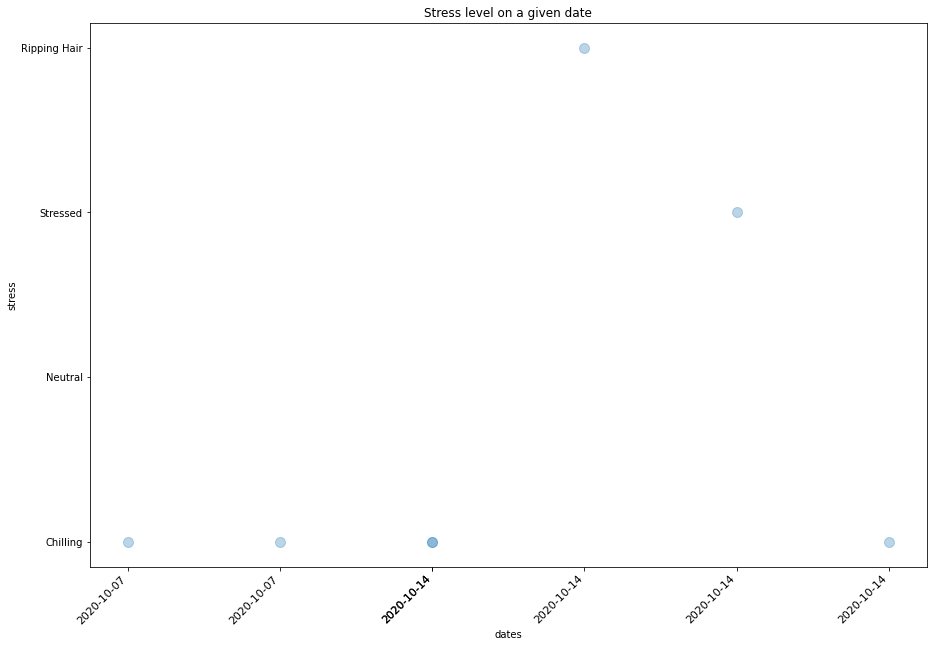

In [21]:
from matplotlib.ticker import MaxNLocator

output = df.plot.scatter(x='dates', y='stress', figsize = (15,10),alpha=.3,s=100)
plt.xticks(df['dates'],df['short_dates'], fontsize = 11,rotation=45, ha='right')
plt.yticks([1,2,3,4],['Chilling', 'Neutral', 'Stressed', 'Ripping Hair'])
plt.title('Stress level on a given date')
plt.savefig('stress.jpg')

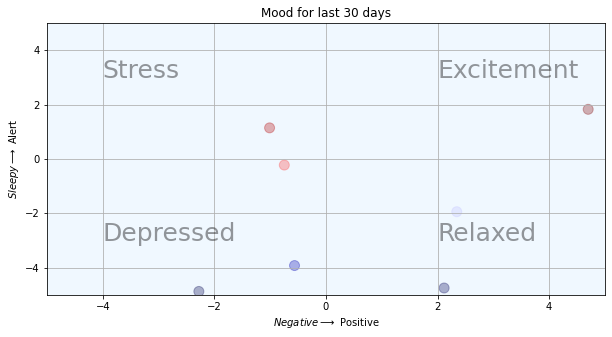

In [155]:
#https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.scatter(mood1,mood2, alpha=0.3, c=mood_sum,cmap='seismic',s=100)
# ax.grid(1)
# ax.set_facecolor("aliceblue")
# ax.set_title("Mood for last "+str(num_days)+" days")
# ax.set_xlabel(r'$Negative \longrightarrow$ Positive')
# ax.set_ylabel(r'$Sleepy \longrightarrow$ Alert')
# ax.text(-4,3,"Stress",alpha=0.4,fontsize=25)
# ax.text(-4,-3,"Depressed",alpha=0.4,fontsize=25)
# ax.text(2,3,"Excitement",alpha=0.4,fontsize=25)
# ax.text(2,-3,"Relaxed",alpha=0.4,fontsize=25)
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# plt.savefig('mood_'+username+'.jpg')

